In [16]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [17]:
DIR_PATH = 'C:/programmering/DTU/robobot/data/aruco'
CM_PATH = 'C:/programmering/DTU/robobot/config/camera/calibration_matrix.npy'
DIST_PATH = 'C:/programmering/DTU/robobot/config/camera/distortion_coefficients.npy'

In [18]:
mtx = np.load(CM_PATH)
dist = np.load(DIST_PATH)

In [19]:
marker_size = 50

marker_points = np.array([[-marker_size / 2, marker_size / 2, 0],
                            [marker_size / 2, marker_size / 2, 0],
                            [marker_size / 2, -marker_size / 2, 0],
                            [-marker_size / 2, -marker_size / 2, 0]], dtype=np.float32)

In [20]:
files = os.listdir(DIR_PATH)


images = [cv2.imread(f"{DIR_PATH}/image_{i}.jpg") for i in range(1, len(files)+1)]
# images = [cv2.imread(os.path.join(DIR_PATH, f)) for f in files]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

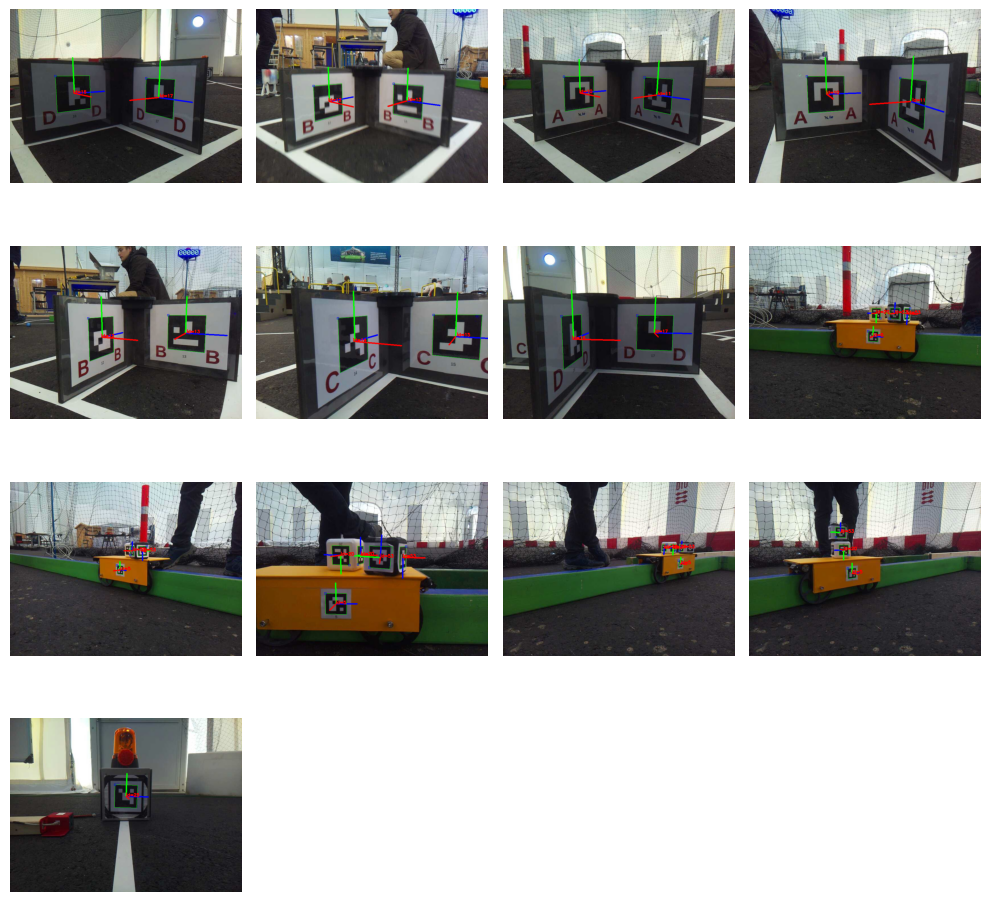

In [21]:
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_100)
parameters = cv2.aruco.DetectorParameters()

# Create the ArUco detector
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
plt.figure(figsize=(10, 10))

for i, img in enumerate(images):
    # Detect the markers
    corners, ids, rejected = detector.detectMarkers(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    
    for _id, _corners in zip(ids, corners):
        # Get the rotation and translation vectors
        ret,rvecs, tvecs = cv2.solvePnP(marker_points, _corners, mtx, dist) 
        
        # Draw the coordinate axes
        img = cv2.drawFrameAxes(img, mtx, dist, rvecs, tvecs, marker_size)
    
    # Draw the markers
    img = cv2.aruco.drawDetectedMarkers(img, corners, ids)
    plt.subplot(4, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
    # plt.title(f"Image {i+1}, ID: {ids}")
    plt.tight_layout()
    # plt.show()
plt.show()


In [22]:
tvecs


array([[  1.14842222],
       [-24.50405859],
       [403.53468231]])

In [24]:
img.shape

(616, 820, 3)